# Complementaria 5: Cálculo de filas


En este tutorial se utilizará la libreria `jmarkov` en Python para analizar modelos Markovianos de nacimiento y muerte mediante teoría de colas. 

Para analizar cada tipo de cola, es necesario identificar su naturaleza. Para familiarizarnos con la librería, realicemos un ejemplo para una cola $M/M/1$ con tasa de llegada $3h^{-1}$ y tasa de servicio $1h^{-1}$. Dado que es una cola con capacidad infinita, utilizaremos el módulo `mmk`.

In [1]:
from jmarkov.queue.mmk import mmk

 Para crear la cola, utilizamos el método `mmk` que recibe, el número de servidores (k), la tasa de llegadas (arr_rate) y la tasa de servicio (ser_rate).

In [2]:
cola1 = mmk(k=1, arr_rate=3, ser_rate=1)

Antes de calcular medidas de desempeño, debemos revisar si la fila es estable. 

In [3]:
cola1.is_stable()

False

Dado que la utilización es mayor a 1, el sistema no alcanza estado estable. Para continuar con el ejercicio, intercambiaremos los parámetros del modelo para que sea estable. Ahora la tasa de llegada será $1h^{-1}$ y la tasa de servicio $3h^{-1}$.

In [4]:
cola1 = mmk(k=1, arr_rate=1, ser_rate=3) # Creamos el objeto tipo cola
cola1.is_stable() # Revisamos estabilidad

True

Con una fila estable, es posible obtener medidas de interés utilizando los métodos: 

| Comando | Operacion |
|:---:|:---:|
| `mean_number_entities` | Calcula el número promedio de entidades que hay en el sistema. |
| `mean_number_entities_queue` | Calcula el número promedio de entidades que hay en fila. |
| `mean_number_entities_service` | Calcula el número promedio de entidades que hay en servicio. |
| `mean_time_system` |  Calcula el tiempo promedio que permanece una entidad en el sistema.|
| `mean_time_queue` |Calcula el tiempo promedio que permanece una entidad en cola. |
| `mean_time_service` | Calcula el tiempo promedio que permanece una entidad en servicio.|

Revisemos el uso de algunas de ellas.

Por ejemplo, si nos interesa conocer el número promedio de entidades en el sistema, utilizamos el comando de la siguiente manera:

In [5]:
num_promedio_entidades = cola1.mean_number_entities()
num_promedio_entidades

np.float64(0.49999999999999983)

Por otro lado, si es de interés conocer el tiempo promedio que las entidades permanecen en fila, se utiliza el siguiente comando:

In [6]:
tiempo_promedio_fila = cola1.mean_time_queue()
tiempo_promedio_fila

np.float64(0.16666666666666666)

A continuación, resolveremos los ejercicios propuestos en el archivo `Complementaria 8 (Q).pdf` que se encuentra en Bloque Neón.

## Problema 1: FoodTruck

A un Food Truck en la ciudad de Bogotá llegan en promedio 80 clientes por hora, de acuerdo con un
Proceso de Poisson. 
El Food Truck cuenta con dos empleadas: Daniela y Isabella, y cada una tarda
en promedio 1.2 minutos en atender a un cliente. Tenga en cuenta que los clientes esperan en una
única fila hasta que alguna de las empleadas se desocupe, y suponga que los tiempos de atención de
ambas empleadas siguen una distribución exponencial. 

A partir de lo anterior, determine:
1) El número esperado de clientes en el Food Truck en estado estable.
2) El tiempo promedio que un cliente debe esperar en fila para ser atendido.
3) La fracción de tiempo que Daniela permanece ociosa.
4) Suponga que el FoodTruck ha decidido contratar un tercer empleado, Esteban, que tarda el
mismo tiempo que Daniela o Isabella en atender a un cliente. Calcule nuevamente la fracción
del tiempo que Daniela permanece ociosa.

Este problema corresponde a una cola $M/M/2$ debido a que se tienen dos servidores. La tasa de llegada es de $80 \frac{personas}{hora}$ y la tasa de servicio es de $50\frac{personas}{hora}$. Así, definamos los parámetros y creemos el objeto tipo cola.

In [7]:
foodtruck = mmk(k=2, arr_rate=80 ,ser_rate=50)

### Literal a

En el literal a, se debe hallar el número esperado de clientes en estado estable. Para esto, verificamos que el sistema alcance estado estable. 

In [8]:
foodtruck.is_stable()

True

Como el sistema es estable, podemos hallar el número esperado de clientes en el Food Truck $(L)$.

In [9]:
clientes = foodtruck.mean_number_entities()
clientes

np.float64(4.444444420905357)

Así, en promedio en el Food Truck habrá 4.44 personas en estado estable. 

Para un tomador de decisiones puede ser de interés conocer cuantas de estas personas están en fila y cuantas siendo atendidas. Calculemos el número de personas en fila y en servicio.

In [10]:
clientesFila = foodtruck.mean_number_entities_queue()
clientesFila

np.float64(2.844444421358036)

In [11]:
clientesServicio = foodtruck.mean_number_entities_service()
clientesServicio

1.6

Ahora, realizaremos una gráfica comparativa para el número promedio de personas en fila y el número promedio de personas en servicio. 

In [12]:
import matplotlib.pyplot as plt
import numpy as np

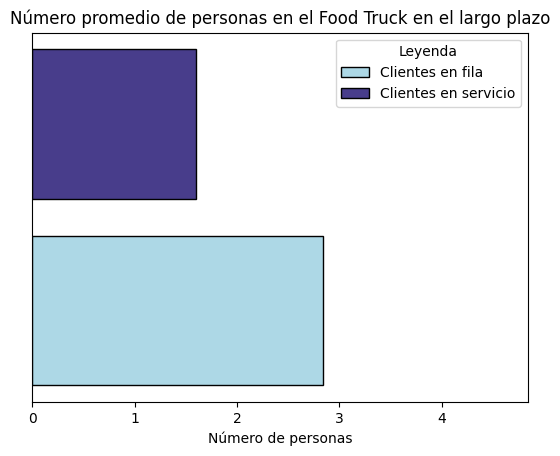

In [13]:
positions = np.arange(len(["Clientes en fila", "Clientes en servicio"]))


plt.barh(
    y=positions[0], 
    width=clientesFila, 
    color="lightblue", 
    edgecolor="black", 
    label="Clientes en fila"
)
plt.barh(
    y=positions[1], 
    width=clientesServicio, 
    color="darkslateblue", 
    edgecolor="black", 
    label="Clientes en servicio"
)

plt.yticks([]) 
plt.xlabel("Número de personas")
plt.title("Número promedio de personas en el Food Truck en el largo plazo")
plt.xlim(0, max([clientesFila, clientesServicio]) + 2)  
plt.legend(["Clientes en fila", "Clientes en servicio"], title="Leyenda")  

# Mostrar gráfico
plt.grid(axis='x', linestyle='') 
plt.show()


### Literal b

Para el literal b, se debe hallar el tiempo en horas que un cliente debe esperar en fila para ser atendido.

In [14]:
tiempoFila = foodtruck.mean_time_queue()
tiempoFila

np.float64(0.03555555526697545)

De igual modo, construiremos una gráfica comparativa entre el tiempo de servicio y el tiempo en fila. Entonces, debemos calcular el tiempo en fila y el tiempo en servicio.

In [15]:
tiempoServicio = foodtruck.mean_time_service()
tiempoServicio

0.02

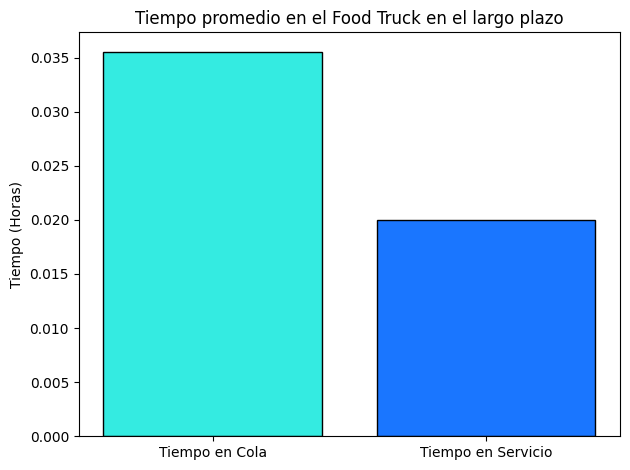

In [16]:
etiquetas = ["Tiempo en Cola", "Tiempo en Servicio"]
tiempos = [tiempoFila, tiempoServicio] 

plt.bar(
    x=etiquetas, 
    height=tiempos, 
    color=['#34EBE1', '#1A76FF'], 
    edgecolor="black"
)

plt.title("Tiempo promedio en el Food Truck en el largo plazo")
plt.xlabel("")
plt.ylabel("Tiempo (Horas)")

plt.tight_layout()
plt.show()


### Literal c

Para el literal c, se debe hallar la fracción del tiempo que Daniela se encuentra ociosa. 

Daniela estará ociosa cuando no haya personas en el sistema y la mitad del tiempo cuando haya una persona en el sistema. Esta fracción del tiempo corresponde a: $\pi_0 + 0.5 \cdot \pi_1$

Para hallar las probabilidades en estado estable utilizamos el atributo ``probs``, el cual nos devuelve un vector que guarda la probabilidad de estar en cada uno de los estados del sistema, en el largo plazo.

In [17]:
estado_estable = foodtruck.probs

Luego, podemos hacer el cálculo de la siguiente forma:

In [18]:
daniela_ociosa = estado_estable[0] + 0.5*estado_estable[1]
daniela_ociosa

np.float64(0.2)

Esto quiere decir que, el 20% del tiempo, Daniela estará ociosa.

### Literal d

Finalmente, para el literal d, se debe hallar la fracción del tiempo que Daniela se encuentra ociosa dado que se contrató un tercer empleado.

Este problema corresponde a una cola $M/M/3$, manteniendo las mismas tasas de llegada y de servicio. Así, debemos crear un nuevo objeto tipo cola. 

In [19]:
foodtruck2 = mmk(k=3, arr_rate=80, ser_rate=50)

Con la inclusión de un tercer servidor, Daniela estará ociosa cuando no haya personas en el sistema, dos tercios del tiempo cuando haya solo una persona en el sistema y un tercio del tiempo cuando haya dos personas en el sistema. Siguiendo la lógica del literal anterior, se puede calcular esta proporción del tiempo para cada cantidad de personas en el sistema, de la siguiente manera:

$\text{Proporción del tiempo desocupada con i personas en el sistema} = \pi_i \cdot \frac{s-i}{s},\ \forall i < s$

Entonces, la proporción del tiempo que Daniela estará desocupada se calcula mediante la siguiente expresión:

<div align="center">

$\sum_{i=0}^{s-1} \pi_i \cdot \frac{s-i}{s}$

</div>

Procedemos ahora a revisar estabilidad:

In [20]:
foodtruck2.is_stable()

True

Calculamos las probabilidades en estado estable:

In [21]:
foodtruck2._solve_bd_process(3)
estado_estable2 = foodtruck2.probs

Encontramos la métrica de interés:

In [22]:
daniela_ociosa2 = 0
for i in range(0, 3):
    daniela_ociosa2 += estado_estable2[i]*((3-i)/3)
daniela_ociosa2

np.float64(0.4666666666666667)

Notemos que, si calculamos la utilización se obtiene:

In [23]:
utilizacion = 80/(3*50)
utilizacion

0.5333333333333333

In [24]:
1-utilizacion

0.4666666666666667

Lo que quiere decir que, si $\rho_s$ es igual a la propoción del tiempo que el sistema está siendo utilizado, $1-\rho_s$ es la proporción del tiempo que uno de los servidores está desocupado. 

<div align="center">

$\sum_{i=0}^{s-1} \pi_i \cdot \frac{s-i}{s} = 1 - \rho_s$

</div>

## Problema 2: Peluquería

A una recién inaugurada peluquería llega en promedio 20 clientes por hora para realizarse un corte
de pelo. El establecimiento únicamente tiene 10 asientos por lo que, si todos se encuentran ocupados,
los clientes que llegan deciden dirigirse a otra peluquería. María es la única empleada del
establecimiento, por lo que es ella quien realiza todos los cortes de pelo, y tarda un tiempo que se
distribuye exponencial con tasa $\frac{1}{12}min^{−1}$ en cada uno. 

Suponga que el tiempo entre llegadas se
distribuye exponencial y responda los siguientes literales:

1) ¿Cuántos cortes de pelo realiza en promedio María en una hora?
2) ¿Cuál es el tiempo promedio que un cliente permanece en la peluquerí

De acuerdo al enunciado del Problema 2, la peluquería tiene una capacidad de 10 clientes en total, y tiene una única servidora. Por lo tanto, el sistema se puede modelar como una cola $M/M/1/G/10/\infty$. De este modo, se utiliza el módulo `mmkn` donde $n=10$. Se conoce que la tasa de entrada es de $\frac{1}{3}m^{-1}$, y la tasa de servicio es de $\frac{1}{12}m^{-1}$. 

In [25]:
from jmarkov.queue.mmkn import mmkn

La función `mmkn` recibe el número de servidores (k), tasa de llegadas (arr_rate), tasa de servicio (ser_rate) y la capacidad del sistema (n).

In [26]:
peluqueria = mmkn(k=1, arr_rate=1/3, ser_rate=1/12, n=10)

### Literal a

Se debe hallar el número de cortes de pelo que se realizan en una hora. Esto corresponde a la tasa efectiva de entrada al sistema. En Python, podemos llamar el método ``_solve_db_process()`` para resolver el proceso de nacimiento y muerte, encontrando las probabilidades en estado estable y luego llamando el atributo ``eff_arr_rate``. 

In [27]:
peluqueria._solve_bd_process()
tasa_efectiva_minutos = peluqueria.eff_arr_rate

tasa_efectiva_horas = tasa_efectiva_minutos*60
tasa_efectiva_horas

np.float64(4.999996423720461)

Esto quiere decir que, en promedio en la peluquería se atienden 4.99 personas en una hora.

### Literal b

Ahora, se debe hallar el tiempo promedio en horas que un cliente permanece en la peluquería.

In [28]:
tiempo_total_minutos = peluqueria.mean_time_system()
(tiempo_total_minutos/60)

np.float64(1.9333352406837852)

Universidad de los Andes | Vigilada Mineducación. Reconocimiento como Universidad: Decreto 1297 del 30 de mayo de 1964. Reconocimiento personería jurídica: Resolución 28 del 23 de febrero de 1949 Minjusticia. Departamento de Ingeniería Industrial Carrera 1 Este No. 19 A 40 Bogotá, Colombia Tel. (57.1) 3324320 | (57.1) 3394949 Ext. 2880 /2881 http://industrial.uniandes.edu.co